In [1]:
# to access functions from other locations
import sys
sys.path.append('/data/ad181/RemoteDir/Paper_1_codes_revised')

In [2]:
%matplotlib notebook
import numpy as np
import time
import pickle
import os
import matplotlib.pyplot as plt

import gym
import torch as th
from stable_baselines3.a2c import A2C, MlpPolicy
from stable_baselines3.common.vec_env import SubprocVecEnv, DummyVecEnv
from stable_baselines3.common.callbacks import CallbackList
from utils.custom_eval_callback import CustomEvalCallback
from typing import Callable
from utils.env_wrappers import StateCoarse

from utils.plot_functions import plot_learning
from utils.env_wrappers import StepReset

/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/co

In [3]:
seed=1
case='case_2_a2c'

In [4]:
os.makedirs('./data', exist_ok=True)
os.makedirs('./data/'+case, exist_ok=True)

In [5]:
with open('../envs_params/env_data/env_train.pkl', 'rb') as input:
    env_train = pickle.load(input)

with open('../envs_params/env_data/env_eval.pkl', 'rb') as input:
    env_eval = pickle.load(input)

In [6]:
# env wrapper to reduce state space
x_coords, y_coords = env_train.p_x, env_train.p_y

def env_wrappers(env, x_coords, y_coords):
    env = StateCoarse(env, x_coords, y_coords, include_well_pr=True)
    env = StepReset(env)
    return env

In [7]:
def make_env(env, rank: int, seed: int = 0) -> Callable:
    """
    Utility function for multiprocessed env.
    
    :param env_id: (str) the environment ID
    :param num_env: (int) the number of environment you wish to have in subprocesses
    :param seed: (int) the inital seed for RNG
    :param rank: (int) index of the subprocess
    :return: (Callable)
    """
    def _init() -> gym.Env:
        env_ = env
        env_.seed(seed + rank)
        return env_
    return _init

seed 1
Box(-100000.0, 100000.0, (9,), float64)
seed 1: model definition ..
Using cuda device
seed 1: learning ..


/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f9e14893438> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f9e1482b470>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f9e14893438> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f9e1482b4a8>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


Eval num_timesteps=3200, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=3200, episode_reward=0.59 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6400, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=6400, episode_reward=0.59 +/- 0.00
Episode length: 4.00 +/- 0.00
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 4        |
|    mean_reward        | 0.586    |
| time/                 |          |
|    fps                | 106      |
|    iterations         | 10       |
|    time_elapsed       | 60       |
|    total_timesteps    | 6400     |
| train/                |          |
|    entropy_loss       | 7.41     |
|    explained_variance | -0.161   |
|    learning_rate      | 0.0001   |
|    n_updates          | 9        |
|    policy_loss        | -1.71    |
|    std                | 0.055    |
|    value_loss         | 0.

Eval num_timesteps=57600, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=57600, episode_reward=0.59 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 4        |
|    mean_reward        | 0.595    |
| time/                 |          |
|    fps                | 108      |
|    iterations         | 90       |
|    time_elapsed       | 528      |
|    total_timesteps    | 57600    |
| train/                |          |
|    entropy_loss       | 7.4      |
|    explained_variance | 0.557    |
|    learning_rate      | 0.0001   |
|    n_updates          | 89       |
|    policy_loss        | -0.117   |
|    std                | 0.055    |
|    value_loss         | 0.0101   |
------------------------------------
Eval num_timesteps=60800, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_time

Eval num_timesteps=105600, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=105600, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=108800, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=108800, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 4        |
|    mean_reward        | 0.607    |
| time/                 |          |
|    fps                | 109      |
|    iterations         | 170      |
|    time_elapsed       | 996      |
|    total_timesteps    | 108800   |
| train/                |          |
|    entropy_loss       | 7.41     |
|    explained_variance | 0.744    |
|    learning_rate      | 0.0001   |
|    n_updates          | 169      |
|    policy_loss        | -0.06    |
|    std                | 0.055    |
|    value_loss     

Eval num_timesteps=156800, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=156800, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=160000, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=160000, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 4        |
|    mean_reward        | 0.605    |
| time/                 |          |
|    fps                | 108      |
|    iterations         | 250      |
|    time_elapsed       | 1470     |
|    total_timesteps    | 160000   |
| train/                |          |
|    entropy_loss       | 7.4      |
|    explained_variance | 0.789    |
|    learning_rate      | 0.0001   |
|    n_updates          | 249      |
|    policy_loss        | -0.0278  |
|    std                | 0.055    |
|    value_loss         | 0.00584  |
---------------------------

Eval num_timesteps=211200, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=211200, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 4        |
|    mean_reward        | 0.606    |
| time/                 |          |
|    fps                | 108      |
|    iterations         | 330      |
|    time_elapsed       | 1944     |
|    total_timesteps    | 211200   |
| train/                |          |
|    entropy_loss       | 7.41     |
|    explained_variance | 0.792    |
|    learning_rate      | 0.0001   |
|    n_updates          | 329      |
|    policy_loss        | -0.00405 |
|    std                | 0.055    |
|    value_loss         | 0.00579  |
------------------------------------
Eval num_timesteps=214400, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=214400, episode_reward=0.61 +/- 0.00
Episode length: 4.00

Eval num_timesteps=265600, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=265600, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=268800, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=268800, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 4        |
|    mean_reward        | 0.605    |
| time/                 |          |
|    fps                | 108      |
|    iterations         | 420      |
|    time_elapsed       | 2480     |
|    total_timesteps    | 268800   |
| train/                |          |
|    entropy_loss       | 7.41     |
|    explained_variance | 0.805    |
|    learning_rate      | 0.0001   |
|    n_updates          | 419      |
|    policy_loss        | 0.00339  |
|    std                | 0.0549   |
|    value_loss         | 0.00558  |
---------------------------

<IPython.core.display.Javascript object>


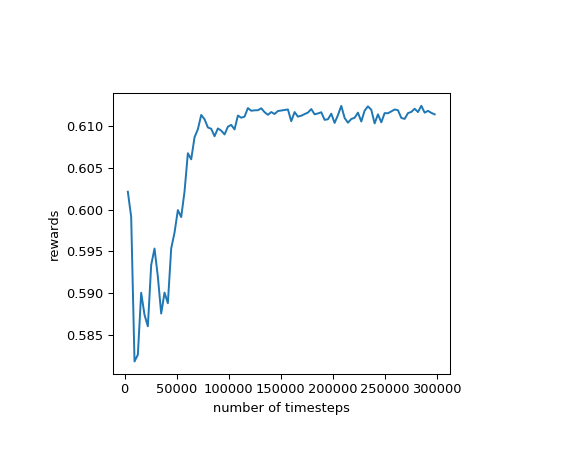

<IPython.core.display.Javascript object>


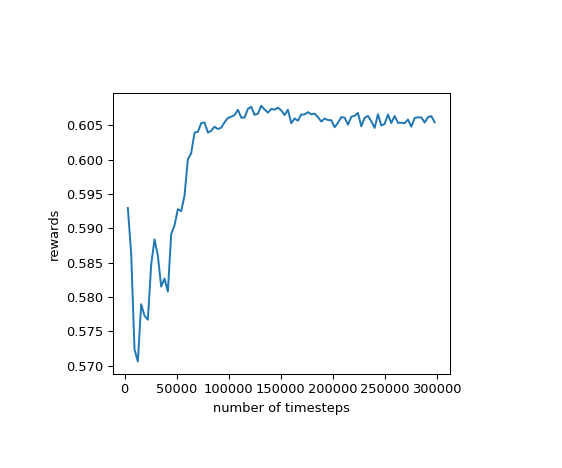

seed 2
Box(-100000.0, 100000.0, (9,), float64)
seed 2: model definition ..
Using cuda device
seed 2: learning ..


/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f9df43cf898> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f9df43c4da0>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f9df43cf898> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f9df43c49e8>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


Eval num_timesteps=3200, episode_reward=0.58 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=3200, episode_reward=0.58 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6400, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6400, episode_reward=0.59 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 4        |
|    mean_reward        | 0.591    |
| time/                 |          |
|    fps                | 109      |
|    iterations         | 10       |
|    time_elapsed       | 58       |
|    total_timesteps    | 6400     |
| train/                |          |
|    entropy_loss       | 7.41     |
|    explained_variance | -2.81    |
|    learning_rate      | 0.0001   |
|    n_updates          | 9        |
|    policy_loss        | -1.25    |
|    std             

Eval num_timesteps=54400, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=54400, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=57600, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=57600, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 4        |
|    mean_reward        | 0.6      |
| time/                 |          |
|    fps                | 110      |
|    iterations         | 90       |
|    time_elapsed       | 522      |
|    total_timesteps    | 57600    |
| train/                |          |
|    entropy_loss       | 7.41     |
|    explained_variance | 0.555    |
|    learning_rate      | 0.0001   |
|    n_updates          | 89       |
|    policy_loss        | -0.108   |
|    std                | 0.055    |
|    value_loss         | 0.00916  |
---------

Eval num_timesteps=105600, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=105600, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=108800, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=108800, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 4        |
|    mean_reward        | 0.606    |
| time/                 |          |
|    fps                | 110      |
|    iterations         | 170      |
|    time_elapsed       | 988      |
|    total_timesteps    | 108800   |
| train/                |          |
|    entropy_loss       | 7.41     |
|    explained_variance | 0.751    |
|    learning_rate      | 0.0001   |
|    n_updates          | 169      |
|    policy_loss        | -0.0364  |
|    std                | 0.055    |
|    value_loss     

Eval num_timesteps=156800, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=160000, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=160000, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 4        |
|    mean_reward        | 0.606    |
| time/                 |          |
|    fps                | 110      |
|    iterations         | 250      |
|    time_elapsed       | 1454     |
|    total_timesteps    | 160000   |
| train/                |          |
|    entropy_loss       | 7.41     |
|    explained_variance | 0.797    |
|    learning_rate      | 0.0001   |
|    n_updates          | 249      |
|    policy_loss        | -0.02    |
|    std                | 0.0549   |
|    value_loss         | 0.00553  |
------------------------------------
Eval num_timesteps=163200, episode_reward=0.61 +/- 0.00
Episode length: 4.00

Eval num_timesteps=211200, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=211200, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 4        |
|    mean_reward        | 0.607    |
| time/                 |          |
|    fps                | 109      |
|    iterations         | 330      |
|    time_elapsed       | 1922     |
|    total_timesteps    | 211200   |
| train/                |          |
|    entropy_loss       | 7.42     |
|    explained_variance | 0.805    |
|    learning_rate      | 0.0001   |
|    n_updates          | 329      |
|    policy_loss        | -0.0273  |
|    std                | 0.0549   |
|    value_loss         | 0.00542  |
------------------------------------
Eval num_timesteps=214400, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=214400, episode_reward=0.61 +/- 0.00
Episode length: 4.00

Eval num_timesteps=265600, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=265600, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=268800, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=268800, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 4        |
|    mean_reward        | 0.606    |
| time/                 |          |
|    fps                | 109      |
|    iterations         | 420      |
|    time_elapsed       | 2451     |
|    total_timesteps    | 268800   |
| train/                |          |
|    entropy_loss       | 7.42     |
|    explained_variance | 0.824    |
|    learning_rate      | 0.0001   |
|    n_updates          | 419      |
|    policy_loss        | -0.0112  |
|    std                | 0.0549   |
|    value_loss         | 0.00506  |
---------------------------

<IPython.core.display.Javascript object>


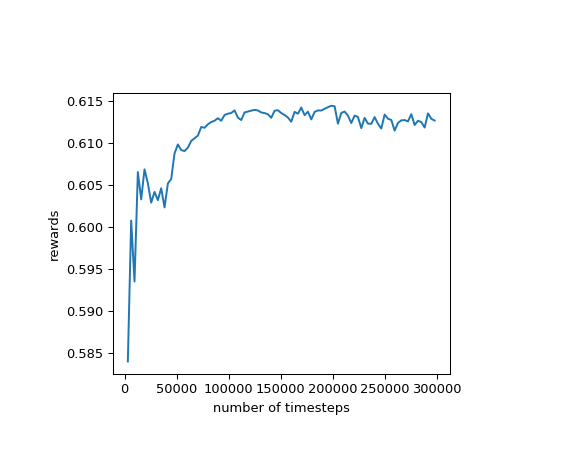

<IPython.core.display.Javascript object>


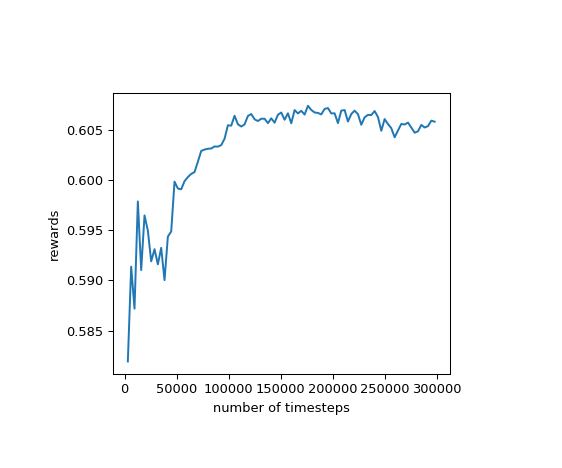

seed 3
Box(-100000.0, 100000.0, (9,), float64)
seed 3: model definition ..
Using cuda device
seed 3: learning ..


/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f9df4371828> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f9df44e1be0>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f9df4371828> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f9df4371a90>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


Eval num_timesteps=3200, episode_reward=0.58 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=3200, episode_reward=0.58 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6400, episode_reward=0.57 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=6400, episode_reward=0.58 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 4        |
|    mean_reward        | 0.58     |
| time/                 |          |
|    fps                | 107      |
|    iterations         | 10       |
|    time_elapsed       | 59       |
|    total_timesteps    | 6400     |
| train/                |          |
|    entropy_loss       | 7.41     |
|    explained_variance | 0.0995   |
|    learning_rate      | 0.0001   |
|    n_updates          | 9        |
|    policy_loss        | -1.85    |
|    std                | 0.055    |
|    v

Eval num_timesteps=54400, episode_reward=0.59 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=54400, episode_reward=0.59 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=57600, episode_reward=0.59 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=57600, episode_reward=0.59 +/- 0.00
Episode length: 4.00 +/- 0.00
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 4        |
|    mean_reward        | 0.592    |
| time/                 |          |
|    fps                | 109      |
|    iterations         | 90       |
|    time_elapsed       | 524      |
|    total_timesteps    | 57600    |
| train/                |          |
|    entropy_loss       | 7.41     |
|    explained_variance | 0.455    |
|    learning_rate      | 0.0001   |
|    n_updates          | 89       |
|    policy_loss        | -0.106   |
|    std                | 0.055    |
|    value_loss         | 0.0129   |
-------------------------------

Eval num_timesteps=105600, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=105600, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=108800, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=108800, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 4        |
|    mean_reward        | 0.607    |
| time/                 |          |
|    fps                | 109      |
|    iterations         | 170      |
|    time_elapsed       | 992      |
|    total_timesteps    | 108800   |
| train/                |          |
|    entropy_loss       | 7.41     |
|    explained_variance | 0.723    |
|    learning_rate      | 0.0001   |
|    n_updates          | 169      |
|    policy_loss        | -0.0721  |
|    std                | 0.055    |
|    value_loss     

Eval num_timesteps=156800, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=156800, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=160000, episode_reward=0.62 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=160000, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 4        |
|    mean_reward        | 0.61     |
| time/                 |          |
|    fps                | 109      |
|    iterations         | 250      |
|    time_elapsed       | 1462     |
|    total_timesteps    | 160000   |
| train/                |          |
|    entropy_loss       | 7.41     |
|    explained_variance | 0.792    |
|    learning_rate      | 0.0001   |
|    n_updates          | 249      |
|    policy_loss        | -0.0654  |
|    std                | 0.055    |
|    value_loss     

Eval num_timesteps=208000, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=211200, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=211200, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 4        |
|    mean_reward        | 0.61     |
| time/                 |          |
|    fps                | 109      |
|    iterations         | 330      |
|    time_elapsed       | 1934     |
|    total_timesteps    | 211200   |
| train/                |          |
|    entropy_loss       | 7.41     |
|    explained_variance | 0.811    |
|    learning_rate      | 0.0001   |
|    n_updates          | 329      |
|    policy_loss        | -0.0099  |
|    std                | 0.055    |
|    value_loss         | 0.00539  |
------------------------------------
Eval num_timesteps=214400, episode_reward=0.61 +/- 0.00
Episode length: 4.00

Eval num_timesteps=262400, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 4        |
|    mean_reward        | 0.608    |
| time/                 |          |
|    fps                | 109      |
|    iterations         | 410      |
|    time_elapsed       | 2407     |
|    total_timesteps    | 262400   |
| train/                |          |
|    entropy_loss       | 7.41     |
|    explained_variance | 0.824    |
|    learning_rate      | 0.0001   |
|    n_updates          | 409      |
|    policy_loss        | -0.0176  |
|    std                | 0.0549   |
|    value_loss         | 0.00495  |
------------------------------------
Eval num_timesteps=265600, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=265600, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=268800, episode_reward=0.61 +/- 0.00
Episode length: 4.00

<IPython.core.display.Javascript object>


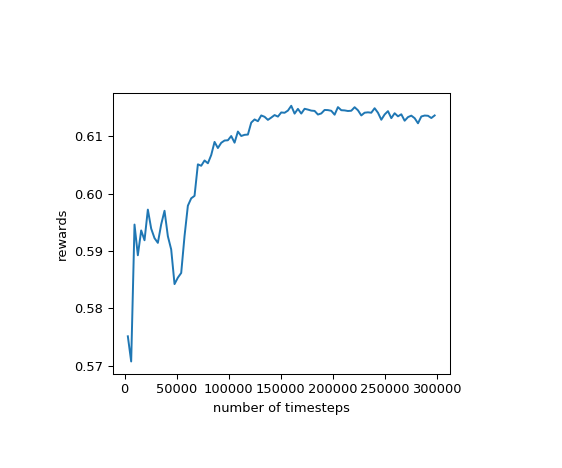

<IPython.core.display.Javascript object>


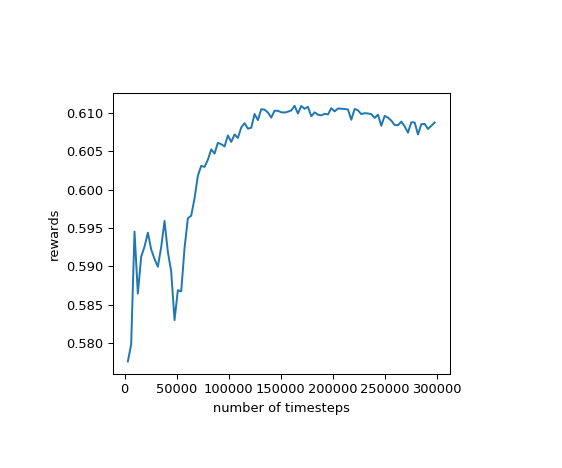

In [8]:
for seed in range(1,4):
    if True:
        print(f'seed {seed}')
        log_dir = './data/'+case+'/seed_'+str(seed)
        os.makedirs(log_dir, exist_ok=True)
        num_cpu = 32
        env_train.seed(seed)
        env_eval.seed(seed)
        env_train_ = env_wrappers(env_train, x_coords, y_coords)
        env_eval_ = env_wrappers(env_eval, x_coords, y_coords)
        train_callback = CustomEvalCallback(env_train_, 
                                            best_model_save_path=None, 
                                            n_eval_episodes=1,
                                            log_path=str(log_dir)+'/results_train', 
                                            eval_freq=100)
        callback_list = [train_callback]
        eval_callback = CustomEvalCallback(env_eval_, 
                                           best_model_save_path=str(log_dir)+'/best_model_eval', 
                                           n_eval_episodes=1,
                                           log_path=str(log_dir)+'/results_eval', 
                                           eval_freq=100)
        callback_list.append(eval_callback)
        callback = CallbackList(callback_list)
        env = SubprocVecEnv([make_env(env_train_, i, seed) for i in range(num_cpu)])
        print(env.observation_space)
#     env = VecMonitor(env, filename=log_dir)
        print(f'seed {seed}: model definition ..')
        model = A2C(policy=MlpPolicy,
                    env=env,
                    learning_rate = 1e-4,
                    n_steps = 20,
                    gamma = 0.99,
                    gae_lambda = 0.95,
                    ent_coef = 0.001,
                    vf_coef = 0.5,
                    max_grad_norm = 0.3,
                    use_sde= False,
                    create_eval_env= False,
                    policy_kwargs = dict(net_arch=[20,20], 
                                         log_std_init=-2.9),
                    verbose = 1,
                    seed = seed,
                    device = "auto")
        model.get_parameters()['policy']['mlp_extractor.shared_net.0.weight'][:,4:] = 0
        print(f'seed {seed}: learning ..')
        model.learn(total_timesteps=300000, callback=callback, log_interval=10)
        model.save(log_dir+'/A2C')
        fig = plot_learning(log_dir, case='train')
        fig.savefig(log_dir+'/learn_train.png')
        fig = plot_learning(log_dir, case='eval')
        fig.savefig(log_dir+'/learn_eval.png')